#### Data preparation


In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from typing import List
from typing import Tuple

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x_train shape: {x_train.shape} x_test.shape: {x_test.shape}")


x_train shape: (455, 30) x_test.shape: (114, 30)


#### Cross Validation


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [5]:
def print_cv_results(scores: List[float]) -> Tuple[float, float]:
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    print(f"Accuracies:\n{scores}")
    print(f"Mean Score: {mean_score}")
    print(f"Std Score: {std_score}")
    return mean_score, std_score

In [6]:
def plot_cv_results(scores: List[float], mean_score: float) -> None:
    plt.axhline(mean_score, linestyle="-", color="red")
    plt.plot(range(len(scores)), scores, color="blue")
    plt.xlim(0, len(scores) - 1)
    plt.ylim(0.85, 1)
    plt.legend(["Validation Scores", "Mean Score"])
    plt.show()

Accuracies:
[nan nan nan nan nan]
Mean Score: nan
Std Score: nan


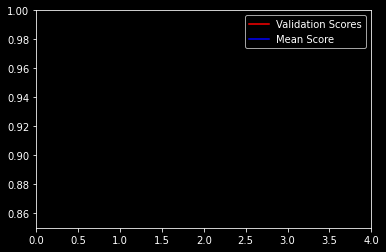

In [7]:
clf = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)

Accuracies:
[nan nan nan nan nan]
Mean Score: nan
Std Score: nan


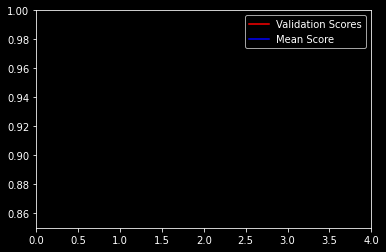

In [8]:
clf = KNeighborsClassifier(n_neighbors=2)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)

Accuracies:
[nan nan nan nan nan]
Mean Score: nan
Std Score: nan


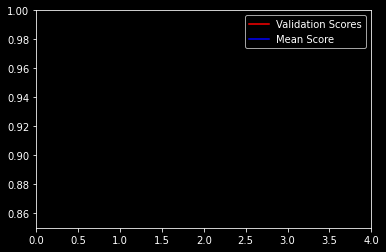

In [9]:
clf = KNeighborsClassifier(n_neighbors=4)

scores = cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)

mean, _ = print_cv_results(scores)
plot_cv_results(scores, mean)